<a href="https://colab.research.google.com/github/AnandSinhaProjects/AI_FOR_MEDICAL_TASKS/blob/main/2D/Validation_and_Split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

import sklearn.model_selection as skl

In [4]:
d = pd.read_csv('/content/findings_data_5000.csv')

In [5]:
d.head()

,Unnamed: 0,Finding Labels,Patient ID,Patient Age,Patient Gender,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,1,57,M,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,No Finding,2,77,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Atelectasis,3,79,M,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cardiomegaly|Edema|Effusion,4,55,F,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Consolidation|Mass,5,68,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
all_labels = np.unique(list(chain(*d['Finding Labels'].map(lambda x:x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]

[Text(0, 0.5, 'Number of Images with Label')]

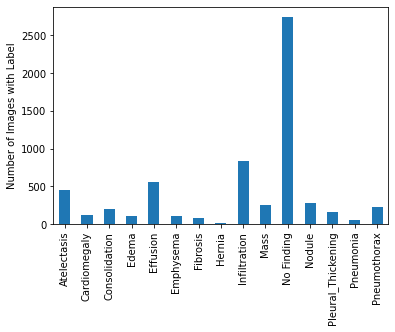

In [7]:
ax = d[all_labels].sum().plot(kind="bar")
ax.set(ylabel= "Number of Images with Label")

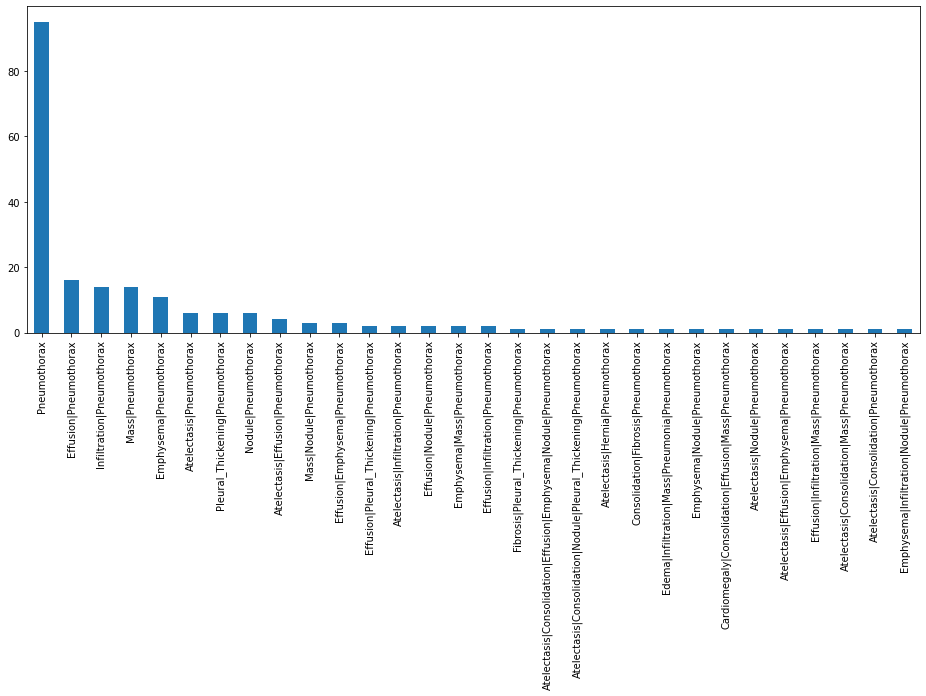

In [9]:
plt.figure(figsize=(16,6))
d[d.Pneumothorax==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

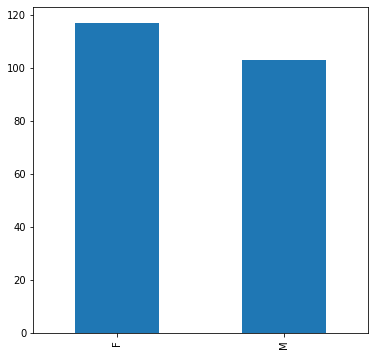

In [11]:
plt.figure(figsize=(6,6))
d[d.Pneumothorax==1]['Patient Gender'].value_counts().plot(kind="bar")

(array([12., 18., 13., 21., 20., 47., 50., 26.,  9.,  4.]),
 array([ 7. , 14.6, 22.2, 29.8, 37.4, 45. , 52.6, 60.2, 67.8, 75.4, 83. ]),
 <a list of 10 Patch objects>)

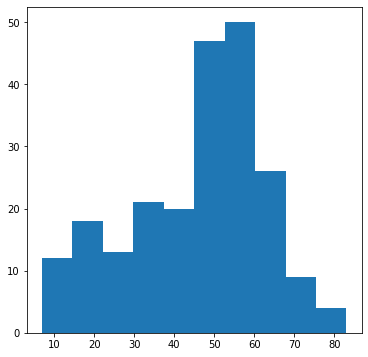

In [12]:
plt.figure(figsize=(6,6))
plt.hist(d[d.Pneumothorax==1]["Patient Age"])

In [18]:
train_df , valid_df = skl.train_test_split(d, test_size=0.2, stratify= d['Pneumothorax'])

In [19]:
train_df["Pneumothorax"].sum()/len(train_df)

0.04401100275068767

In [20]:
valid_df["Pneumothorax"].sum()/len(valid_df)

0.044

In [23]:
p_inds = valid_df[valid_df.Pneumothorax==1].index.tolist()
np_inds = valid_df[valid_df.Pneumothorax==0].index.tolist()

np_sample = sample(np_inds, 4*len(p_inds))
valid_df = valid_df.loc[p_inds + np_sample]

In [24]:
valid_df['Pneumothorax'].sum()/len(valid_df)

0.2